# Linear Programming in Python

## Introduction (1)

There are a ton of problems in the data science realm that do not require advanced machine learning techniques. These types of problems, are not predictive in nature because we already know all of the possible values that the target variable can take. That doesn't mean that we have a simple problem. A common scenario that you'll see time and time again is a need for calculating a set of values for the independent variable that gives us an optimal target; i.e., we have an optimization problem.

## Introduction (2)

Many problems that you'll face on a day-to-day basis are not the sexy type that you get to throw your favorite machine learning algorithms at. Many problems that you'll face are optimization problems rather than predictive ones.

## Introduction (3)

Many problems that you'll face on a day-to-day basis are not the sexy type that you'll get to throw your favorite machine learning algorithm at. These types of problems are not predictive in nature, and thus there's no need to learn from a sample set of data. Rather, these types of problems are about optimization and they tend to fall under a branch of mathematics known as Operations Research.

## Terminology

<dl>

<dt>Linear Programming</dt>
<dd>A form of mathematical optimization that deals specifically with linear equations. Linear Programming is also known as Linear Optimization.</dd>

<dt>Linear program</dt>
<dd>A linear program is a problem where a set of decisions need ot be made to optimize an objective in light of some constraints, where botht the constraints and the objective are linear.</dd>

<dt>Objective Function</dt>
<dd>The objective function is what we are trying to optimize. Specifically, it is a linear equation whose dependent variable we are typically trying to either minimize or maximize.</dd>

<dt>The Decisions</dt>
<dd>These are essentially the independent variables in our objective function. These repesent the decisions that we need to make. In the classic economic example, it would be the number of guns vs. amount of butter that we should produce.</dd>

<dt>Constraints</dt>
<dd>The constraints in our linear program are represented as a set of linear inequalities that limit what decisions we can make.</dd>

<dt>Polytype</dt>
<dd>A polytype is a geometric shape with flat sides. It is the multidimensional counterpart to the 2D polygon.</dd>

## The Fundamental Theorem of Linear Programming

[The fundamental theoreom of linear programming][lp_theorem] states, in a nutshell, that the maximum and minimum values for a linear equation over a convex polygonal region will occur at the region's corners.

[lp_theorem]: https://en.wikipedia.org/wiki/Fundamental_theorem_of_linear_programming

<img src="./images/non_convex_polygon.png" width="650">

In [1]:
import numpy as np
from scipy.optimize import linprog

# Objective function coefficients
c = np.array([-195, -150])
# Constraint coefficients
A_ub = np.array([[0.5, 1.5],
                 [150, 100]])
# Constraint values
B_ub = np.array([21, 1800])
linprog(c, A_ub, B_ub)

     fun: -2597.142857142857
 message: 'Optimization terminated successfully.'
     nit: 2
   slack: array([0., 0.])
  status: 0
 success: True
       x: array([ 3.42857143, 12.85714286])

This works, but unfortunately we've been given some numbers that don't really make a ton of sense. While it may be possible to produce a fraction of a ton of butter, producing 43% of a gun isn't going to be of much use. For that reason, we will need to make sure that our solution returns integer values for these decisions. However, solving these linear optimization problems where one or more variables must be an integer, also known as mixed integer problems or MIPs, is functionality that the solvers that the `linprog` function uses do not provide.

```
$ conda install -c cvxgrp cvxpy
```

In [3]:
import cvxpy as cvx

# Set our guns and butter variables to Ints instead of
# Variables to make sure that we only get integer values back.
g = cvx.Int()
b = cvx.Int()

# CVXPY is a DSL for optimization problems, so creating the constraints
# is much more intuitive using this library compared to linprog in scipy.
constraints = [g*0.5 + b*1.5 <= 21,
               g*150 + b*100 <= 1800]

# The same goes for creating the objective function
obj = cvx.Maximize(g*195 + b*150)

# Our problem definition is just the objective function and 
# list of constraints
prob = cvx.Problem(obj, constraints)
prob.solve()

# Even though we specify that we want integers only for our decision
# variables, and the solution does find the integer value, the actual
# value is a float, so we end up with numbers that look like 
# 4.000000... and 11.999999... that we will need to round and turn into
# integers.
print("Maixmum Revenue          : ${}".format(round(prob.value, 2)))
print("Optimal Number of Guns   : {}".format(int(round(g.value))))
print("Optimal Tons of Butter   : {}".format(int(round(b.value))))

Maixmum Revenue          : $2580.0
Optimal Number of Guns   : 4
Optimal Tons of Butter   : 12


You'll notice that in the last paragraph, I mentioned that there was more than one "solver" that the `linprog` function uses. 

In [4]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import matplotlib.pyplot as plt

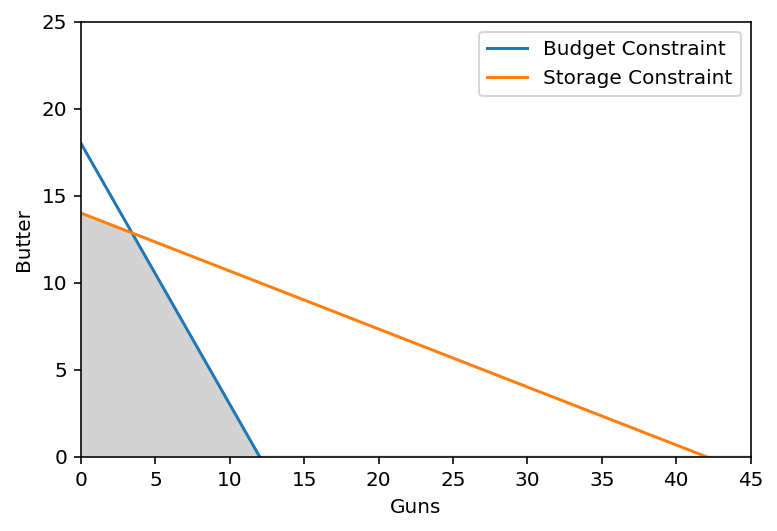

In [5]:
x = np.linspace(0, 45)

# Budget constraint
y1 = 1800/100 - 150/100*x
plt.plot(x, y1, label="Budget Constraint")

# Storage constraint
y2 = 21/1.5 - 0.5/1.5*x
plt.plot(x, y2, label="Storage Constraint")

plt.xlim(0, 45)
plt.ylim(0, 25)

plt.xlabel("Guns")
plt.ylabel("Butter")

upper_bound = np.minimum(y1, y2)
plt.fill_between(x, upper_bound, color='lightgray')

plt.legend()
plt.show()

# Resources

- [The SciPy `linprog` function][scipy-linprog]
- [Convex Optimization overview][convex-optimization], and how linear programming fits in
- [Linear Programming w/ PuLP][pulp-tutorial]
- [PuLP documentation][pulp-docs]
- [Linear Programming w/ CVXOPT][cvxopt-tutorial]
- [CVXOPT documentation][cvxopt-docs]
- [CVXPY documentation][cvxpy-docs] - a domain specific language around Convex Optimization problems.
- [Slides on the Simplex Method][simplex_slides]

[scipy-linprog]: https://docs.scipy.org/doc/scipy-0.18.1/reference/generated/scipy.optimize.linprog.html
[convex-optimization]: https://www.solver.com/convex-optimization
[pulp-tutorial]: http://benalexkeen.com/linear-programming-with-python-and-pulp-part-1/
[pulp-docs]: http://pythonhosted.org/PuLP/
[cvxopt-tutorial]: https://scaron.info/blog/linear-programming-in-python-with-cvxopt.html
[cvxopt-docs]: http://cvxopt.org/userguide/coneprog.html
[cvxpy-docs]: https://cvxgrp.github.io/cvxpy/index.html
[simplex_slides]: http://www.pstcc.edu/facstaff/jwlamb/Math1630/6.1.pdf